## 서울시 노선별, 역별 승하차 인원 사용 데이터(20211101 기준)

In [17]:
import pandas as pd

df = pd.read_csv('지하철.csv',encoding = 'euc-kr')
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20211101,1호선,동대문,10855,10327,20211104
1,20211101,1호선,신설동,13933,13614,20211104
2,20211101,1호선,제기동,17584,17948,20211104
3,20211101,1호선,청량리(서울시립대입구),19604,19787,20211104
4,20211101,2호선,시청,23006,22704,20211104
...,...,...,...,...,...,...
600,20211101,2호선,신림,60916,58969,20211104
601,20211101,2호선,신대방,26338,25427,20211104
602,20211101,6호선,역촌,3832,4456,20211104
603,20211101,1호선,종로3가,24261,22213,20211104


### 가장 많이 이용하는 지하철 노선 구하기

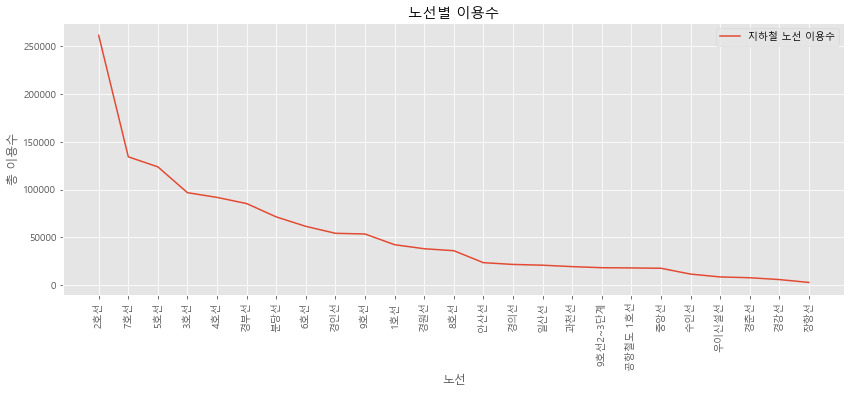

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('지하철.csv',encoding = 'euc-kr')

from matplotlib import font_manager, rc
font_path = './malgun-1.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

# 승차인원과 하차인원 더한 총 이용수를 나타내는 열 추가
df['총 이용수'] = df['승차총승객수'] + df['하차총승객수']

df = df.drop('등록일자', axis = 1) # 불필요한 열 삭제
subway = df.groupby('노선명').sum()[['총 이용수']].sort_values(by = '총 이용수', ascending = False)

plt.style.use('ggplot')
plt.figure(figsize = (14, 5))

plt.plot(subway.index, subway.values // 10)
plt.title('노선별 이용수')
plt.xlabel('노선')
plt.ylabel('총 이용수')
plt.xticks(rotation = 'vertical')
plt.legend(labels=['지하철 노선 이용수'], loc = 'best')

plt.show()

### 2호선 내 가장 많이 이용하는 지하철 역

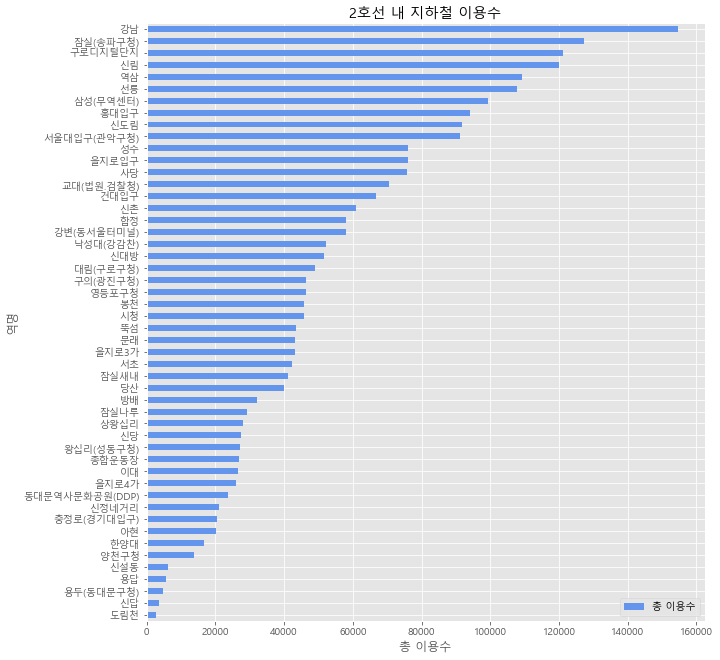

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('지하철.csv',encoding = 'euc-kr')

from matplotlib import font_manager, rc
font_path = './malgun-1.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

# 승차인원과 하차인원 더한 총 이용수를 나타내는 열 추가
df['총 이용수'] = df['승차총승객수'] + df['하차총승객수']

df = df.drop('등록일자', axis = 1) # 불필요한 열 삭제

station = (df['사용일자'] == 20211101) & (df['노선명'] == '2호선')
df_station = df[station]
station_num = df_station.groupby('역명').sum()[['총 이용수']].sort_values(by = '총 이용수')

plt.style.use('ggplot')

station_num.plot(kind = 'barh', color = 'cornflowerblue', width = 0.5, figsize = (10, 11))

plt.title('2호선 내 지하철 이용수')
plt.xlabel('총 이용수')
plt.ylabel('역명')

plt.show()

## 서울시 지하철 시간대 별 승하차 인원 데이터

In [18]:
import pandas as pd

pd.read_csv('서울시 지하철 인원 정보.csv', encoding = 'euc-kr')

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202111,1호선,동대문,782,14,12451,2166,8849,6242,14133,...,8790,47,1776,0,0,0,0,0,0,20211203
1,202111,1호선,동묘앞,141,1,2570,907,3387,4074,5711,...,2974,8,2017,0,2,0,0,0,0,20211203
2,202111,1호선,서울역,630,11,8985,7058,12028,40803,36492,...,12360,101,1257,1,3,2,2,0,0,20211203
3,202111,1호선,시청,30,0,2006,4859,2980,19785,6504,...,2196,65,309,0,0,0,0,0,0,20211203
4,202111,1호선,신설동,327,8,8031,2831,7820,10278,16712,...,7668,39,1222,0,0,0,0,0,0,20211203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48372,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
48373,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
48374,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
48375,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


### 2호선 강남역에서 가장 유동인구가 많은 시간대

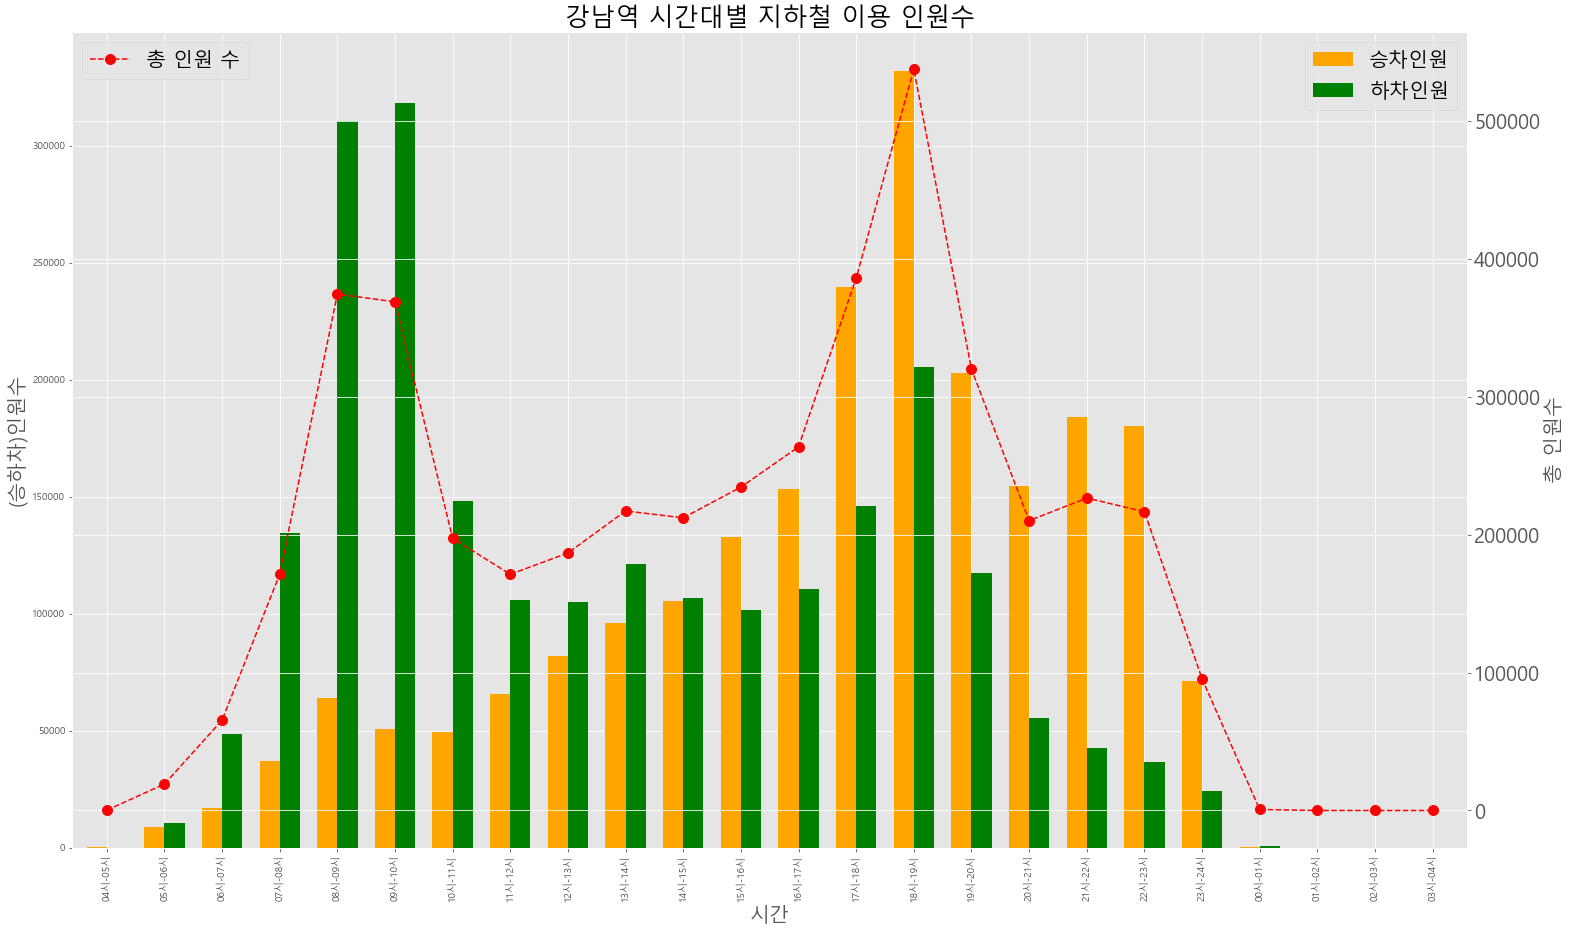

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './malgun-1.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

# 승차인원 열만 가져오기
colup = [2]
for i in range(1,25):
    colup.append(2*i+1)
colup = list(map(int, colup))

# 하차인원 열만 가져오기
coldown = []
for i in range(1,26):
    coldown.append(2*i)
coldown = list(map(int, coldown))

# 강남역 11월 승차 인원 평균
df_up = pd.read_csv('서울시 지하철 인원 정보.csv',encoding = 'euc-kr',
                  skiprows=[1,2,3,4,5,6,7,8,9,10], index_col = '지하철역', nrows = 50, usecols = colup)
df_up.columns = ['04시-05시','05시-06시','06시-07시','07시-08시','08시-09시',
              '09시-10시','10시-11시','11시-12시','12시-13시','13시-14시',
              '14시-15시','15시-16시','16시-17시','17시-18시','18시-19시',
              '19시-20시','20시-21시','21시-22시','22시-23시','23시-24시',
              '00시-01시','01시-02시','02시-03시','03시-04시']

# 강남역 11월 하차 인원 평균
df_down = pd.read_csv('서울시 지하철 인원 정보.csv',encoding = 'euc-kr',
                  skiprows=[1,2,3,4,5,6,7,8,9,10], index_col = '지하철역', nrows = 50, usecols = coldown)
df_down.columns = ['04시-05시','05시-06시','06시-07시','07시-08시','08시-09시',
              '09시-10시','10시-11시','11시-12시','12시-13시','13시-14시',
              '14시-15시','15시-16시','16시-17시','17시-18시','18시-19시',
              '19시-20시','20시-21시','21시-22시','22시-23시','23시-24시',
              '00시-01시','01시-02시','02시-03시','03시-04시']

df_total = df_up.iloc[0] + df_down.iloc[0] # 강남역 승하차 인원 합계

# 강남역 승하차,총 인원의 값만 가진 데이터프레임 생성
new_df = pd.DataFrame([df_up.iloc[0].values, df_down.iloc[0].values, df_total.values],
                      index=['승차인원', '하차인원', '총인원'], columns = df_up.columns)

plt.style.use('ggplot')

# 각 시간대별로 승차인원과 하차인원을 비교해 보여주기 위해 승차인원과 하차인원 행만 가져옴.
new_df_updown = new_df.loc[['승차인원', '하차인원']]
new_df_updown = new_df_updown.transpose()
ax1 = new_df_updown.plot(kind='bar', figsize=(25,15), width=0.7, color=['orange', 'green'])

# 총 인원수를 같은 막대 그래프에 보여주어 비교하기 위해 2축 그래프 생성
ax2 = ax1.twinx()
ax2.plot(new_df.columns, new_df.iloc[2].values, ls='--', marker='o', markersize=10,
        color='red', label = '총 인원 수')   # 총 인원수 그래프 그리기

plt.title('강남역 시간대별 지하철 이용 인원수', fontsize=25)

ax1.set_xlabel('시간', size = 20)
ax1.set_ylabel('(승하차)인원수', size = 20)
ax2.set_ylabel('총 인원수', size = 20)
ax1.legend(loc='best', fontsize=20)
plt.yticks(size=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

### 강남역 11월 승차, 하차, 총인원의 값만 볼 수 있는 데이터프레임

In [2]:
import pandas as pd

# 승차인원 열만 가져오기
colup = [2]
for i in range(1,25):
    colup.append(2*i+1)
colup = list(map(int, colup))

# 하차인원 열만 가져오기
coldown = []
for i in range(1,26):
    coldown.append(2*i)
coldown = list(map(int, coldown))

# 강남역 11월 승차 인원 평균
df_up = pd.read_csv('서울시 지하철 인원 정보.csv',encoding = 'euc-kr',
                  skiprows=[1,2,3,4,5,6,7,8,9,10], index_col = '지하철역', nrows = 50, usecols = colup)
df_up.columns = ['04시-05시','05시-06시','06시-07시','07시-08시','08시-09시',
              '09시-10시','10시-11시','11시-12시','12시-13시','13시-14시',
              '14시-15시','15시-16시','16시-17시','17시-18시','18시-19시',
              '19시-20시','20시-21시','21시-22시','22시-23시','23시-24시',
              '00시-01시','01시-02시','02시-03시','03시-04시']

# 강남역 11월 하차 인원 평균
df_down = pd.read_csv('서울시 지하철 인원 정보.csv',encoding = 'euc-kr',
                  skiprows=[1,2,3,4,5,6,7,8,9,10], index_col = '지하철역', nrows = 50, usecols = coldown)
df_down.columns = ['04시-05시','05시-06시','06시-07시','07시-08시','08시-09시',
              '09시-10시','10시-11시','11시-12시','12시-13시','13시-14시',
              '14시-15시','15시-16시','16시-17시','17시-18시','18시-19시',
              '19시-20시','20시-21시','21시-22시','22시-23시','23시-24시',
              '00시-01시','01시-02시','02시-03시','03시-04시']

df_total = df_up.iloc[0] + df_down.iloc[0] # 강남역 승하차 인원 합계

# 강남역 승하차,총 인원의 값만 가진 데이터프레임 생성
new_df = pd.DataFrame([df_up.iloc[0].values, df_down.iloc[0].values, df_total.values],
                      index=['승차인원', '하차인원', '총인원'], columns = df_up.columns)

new_df

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
승차인원,219,8681,17040,36970,64022,50557,49286,65524,81700,96001,...,332029,202805,154586,184097,180028,71371,87,1,0,0
하차인원,4,10474,48420,134376,310431,318239,147977,105735,105018,121180,...,205453,117181,55556,42434,36659,24139,637,1,0,0
총인원,223,19155,65460,171346,374453,368796,197263,171259,186718,217181,...,537482,319986,210142,226531,216687,95510,724,2,0,0
